In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ReferenceElement import *
from dg_nonlinear_coord_trans import *

In [2]:
start = -5.
end = 10.
N = 8
K = 15
CF = 2.**(-7)
v = 0.2
xi_p = 0.
gamma = 1/np.sqrt(1-v**2)

h = (end-start)/K
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h
xi_int = get_x_elements(start,end,K, reference_interval)
dx_min = get_dx_min(xi_int)
dt = CF*dx_min
for i in range(len(xi_int)):
        if np.round(xi_int[i][-1],6) == np.round(xi_p,6):
            k_p = i
            break
print(k_p)

4


In [20]:
def x_p(t):
    return v*t
def x_p_dot(t):
    return v
def xi_to_x(xi,a,b,t,x_p, xi_p):
    x = a + (x_p(t)-a)/(xi_p-a)*(xi-a) + ((b-x_p(t))*(xi_p-a)-(x_p(t)-a)*(b-xi_p))/((xi_p-a)*(b-xi_p)*(b-a))*(xi-a)*(xi-xi_p)    
    return x
def ana_u(x,v,t):
    gamma = 1/np.sqrt(1-v**2)
    v_style = gamma**2*(t-x*v-np.abs(x-v*t))
    return 1/2*gamma**2*(v+np.sign(x-v*t))*np.cos(v_style)
def ana_du_dx(x,v,t):
    gamma = 1/np.sqrt(1-v**2)
    v_style = gamma**2*(t-x*v-np.abs(x-v*t))
    return 1/2*gamma**4*(1+v**2+2*v*np.sign(x-v*t))*np.sin(v_style)
def ana_du_dt(x,v,t):
    gamma = 1/np.sqrt(1-v**2)
    v_style = gamma**2*(t-x*v-np.abs(x-v*t))
    return -1/2*gamma**4*(2*v+(1+v**2)*np.sign(x-v*t))*np.sin(v_style)
def J1(beta, dx_dxi, t):
    gap_p = (1+v**2)*gamma**4*np.sin(t)
    gap_q = dx_dxi*2*v*gamma**4*np.sin(t)
    return -beta*gap_p + gap_q/dx_dxi**2
def J2(beta, dx_dxi,t):
    gap_p = (1+v**2)*gamma**4*np.sin(t)
    gap_q = dx_dxi*2*v*gamma**4*np.sin(t)
    return -beta*gap_q+gap_p

In [26]:
t = 0.
t_target = 10.
x = xi_to_x(xi_int,start,end,t,x_p,xi_p)
beta_initial = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
u = ana_u(x,v,t)
q = ana_du_dx(x,v,t)
p = beta_initial*q - ana_du_dt(x,v,t)
nt = int((t_target - t)/dt)
print(nt)

25538


In [27]:
for i in range(nt):
    beta = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
    dx_dxi = func_dx_dxi(start, end, t,xi_p,xi_int,x_p)
    d2x_dxi2 = func_d2x_dxi2(start,end,t,xi_p,x_p)
    un=u.copy()
    pn=p.copy()
    qn=q.copy()
    p= RK4_Step(dt, func_dp_dt,pn,un,qn,K,t,M_inv,M_inv_S,True,J1,J2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2)
    q= RK4_Step(dt, func_dq_dt,qn,un,pn,K,t,M_inv,M_inv_S,True,J1,J2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2) 
    u= RK4_Step(dt, func_du_dt,un,pn,qn,K,t,M_inv,M_inv_S,True,J1,J2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2)
    t+=dt

9.999923098366521


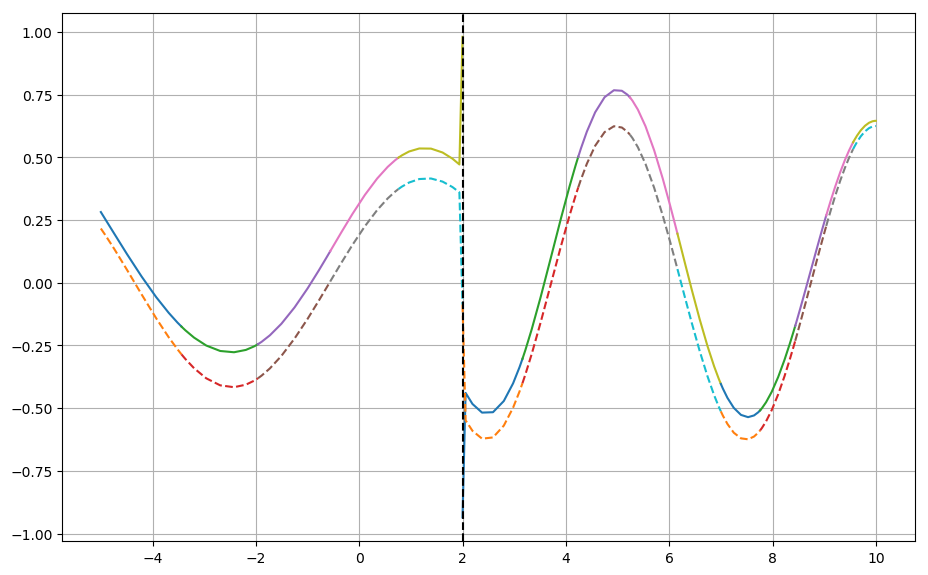

In [28]:
x = xi_to_x(xi_int,start,end,t,x_p,xi_p)
u_exact = ana_u(x,v,t)
plt.figure(figsize=(11, 7), dpi=100)
for i in range(len(x)):
    plt.plot(x[i],u[i])
    plt.plot(x[i],u_exact[i],ls ='--')
print(t)
plt.grid()
plt.axvline(x_p(t), ls ='--', color = 'black')

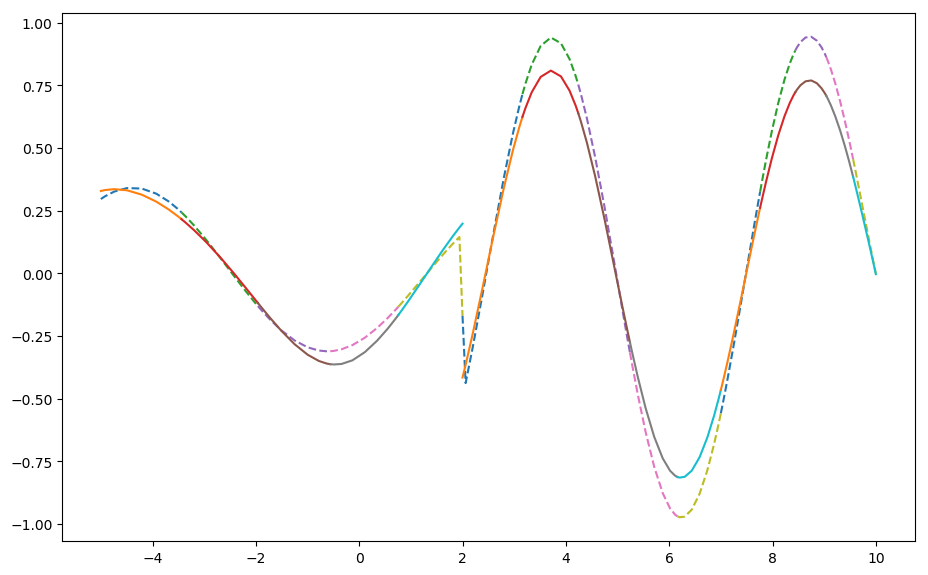

In [29]:
plt.figure(figsize=(11, 7), dpi=100)

beta_ = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
q_exact = ana_du_dx(x,v,t)
p_exact = beta_*q_exact - ana_du_dt(x,v,t)
for i in range(len(x)):
    plt.plot(x[i],p_exact[i],ls ='--')
    plt.plot(x[i],p[i])

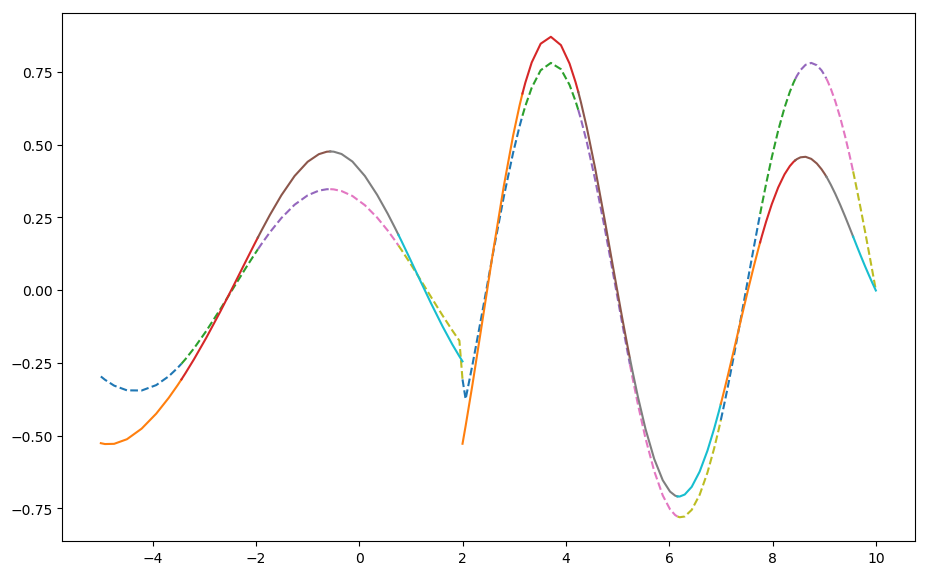

In [30]:
plt.figure(figsize=(11, 7), dpi=100)
for i in range(len(x)):
    plt.plot(x[i],q_exact[i],ls ='--')
    plt.plot(x[i],q[i])